In [12]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model, metrics
sal_df=pd.read_csv('C:\\Users\\USER\\Desktop\\SCRUBS\\homepricett.csv')
sal_df.head()


,area,price
0,2000,550000
1,3000,505000
2,3200,650000
3,5000,660000
4,4000,725000


In [13]:
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


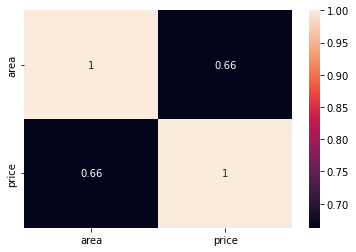

In [14]:
viz=sns.heatmap(sal_df[['area','price']].corr(),annot=True)

In [22]:
#Identify the feature x and outcome variable y  in the dataframe for building model.
x=sm.add_constant(sal_df['area'])
y=sal_df['price']
print(x.shape)
print(y.shape)
x

(5, 2)
(5,)


,const,area
0,1.0,2000
1,1.0,3000
2,1.0,3200
3,1.0,5000
4,1.0,4000


In [23]:
#split the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4, 2)
(1, 2)
(4,)
(1,)


In [24]:
#fitting the model
price_lm=sm.OLS(y_train,x_train).fit()

In [25]:
print(price_lm.params)

const    496863.354037
area         42.080745
dtype: float64


In [26]:
#summary
price_lm.summary2()

C:\Users\USER\ANACONDA\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.319     
Dependent Variable: price            AIC:                100.5487  
Date:               2022-08-11 23:58 BIC:                99.3213   
No. Observations:   4                Log-Likelihood:     -48.274   
Df Model:           1                F-statistic:        2.404     
Df Residuals:       2                Prob (F-statistic): 0.261     
R-squared:          0.546            Scale:              3.5579e+09
-------------------------------------------------------------------
          Coef.      Std.Err.    t    P>|t|    [0.025      0.975]  
-------------------------------------------------------------------
const  496863.3540 100860.5467 4.9262 0.0388 62895.4475 930831.2606
area       42.0807     27.1409 1.5505 0.2612   -74.6972    158.8587
-------------------------------------------------------------------
Omnibus:                nan          Durbin-Watson:           3.378
Prob(Omnibus):          nan          Jarque-Bera (JB):        0.434
Skew:                   0.283        Prob(JB):                0.805
Kurtosis:               1.488        Condition No.:           12568
===================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [27]:
#predict values test data
y_pred_test=price_lm.predict(x_test)
y_pred_train=price_lm.predict(x_train)

In [28]:
#R square for train data
np.abs(r2_score(y_train,y_pred_train))

0.5458579331907918

In [29]:
#calculating root mean square error
np.sqrt(mean_squared_error(y_train,y_pred_train))

42177.71481871908

Text(0, 0.5, 'Predicted')

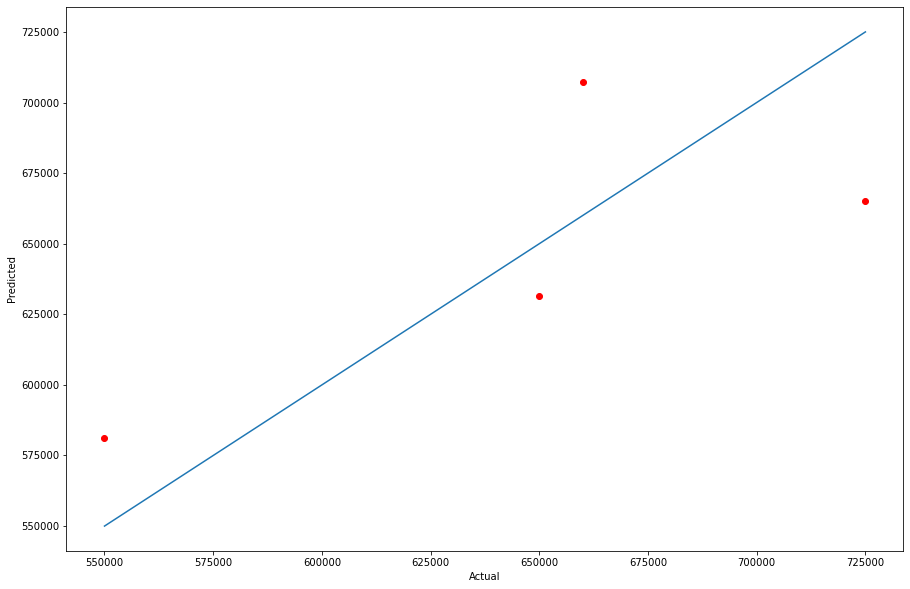

In [43]:
#scatter plot for train
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_pred_train,c='red')
plt.plot((y_train.min(),y_train.max()),(y_train.min(),y_train.max()))
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [46]:
predictions = pd.DataFrame(y_train, columns=['Prediction'])
my_new_df = pd.concat([y_train, predictions], axis =1)
my_new_df

,price,Prediction
2,650000,NaN
3,660000,NaN
4,725000,NaN
0,550000,NaN
